In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Cleaning the dataset
panda = pd.read_excel("lp1.xlsx")
pd1 = (panda['label']).dropna().to_list()
pd2 = panda[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].dropna()
arr = np.array(pd2).flatten().reshape(88,90)
df = pd.DataFrame(arr)
df['position'] = pd1
df.to_csv("first_dataset.csv")

In [3]:
#reading from the cleaned dataset
df = pd.read_csv('first_dataset.csv')

In [4]:
# split into X and Y
X = df.drop(['label'], axis=1)
Y = df['label']

# convert to numpy arrays
X = np.array(X)

(array([21.,  0.,  0., 17.,  0.,  0., 34.,  0.,  0., 16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

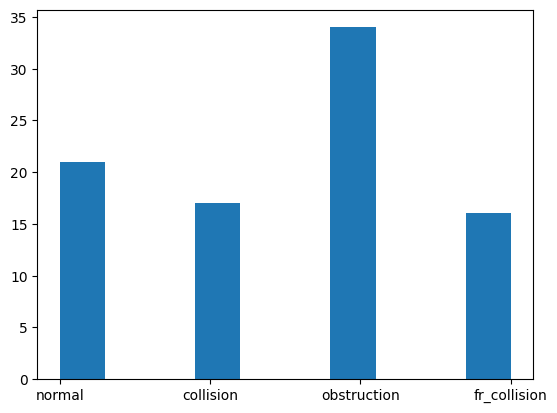

In [5]:
plt.hist(df['label'])

Test and train 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2)

Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   collision       1.00      1.00      1.00         5
fr_collision       1.00      0.80      0.89         5
      normal       1.00      1.00      1.00         3
 obstruction       0.83      1.00      0.91         5

    accuracy                           0.94        18
   macro avg       0.96      0.95      0.95        18
weighted avg       0.95      0.94      0.94        18



One-hot encoding

In [11]:
Y.head()
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, dummy_y , test_size=0.3, random_state = 42)

KNN model  

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      1.00      1.00         5
           2       0.64      1.00      0.78         9
           3       1.00      0.71      0.83         7

   micro avg       0.80      0.74      0.77        27
   macro avg       0.91      0.72      0.73        27
weighted avg       0.88      0.74      0.73        27
 samples avg       0.74      0.74      0.74        27



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Randomforest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(criterion='gini', max_depth=8,min_samples_split=10,random_state=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [17]:
cross_val_score(clf, x_train, y_train, cv=10)

array([0.42857143, 0.5       , 0.83333333, 0.66666667, 0.66666667,
       0.83333333, 0.83333333, 0.83333333, 0.33333333, 0.83333333])

In [22]:
confusion_matrix(y_test, y_pred)

ValueError: multilabel-indicator is not supported

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.83      1.00      0.91         5
           2       1.00      0.89      0.94         9
           3       1.00      0.71      0.83         7

   micro avg       0.95      0.74      0.83        27
   macro avg       0.96      0.73      0.80        27
weighted avg       0.97      0.74      0.81        27
 samples avg       0.74      0.74      0.74        27



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Artificial neural network

In [23]:
# build a model
model = Sequential()
model.add(Dense(50, input_shape=(x_train.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

In [24]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=0)

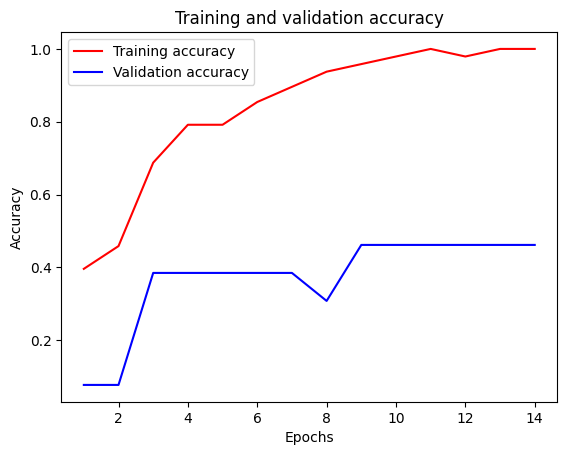

In [25]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(x_test) # see how the model did!
print(y_pred[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(y_pred[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y

# more detail on how well things were predicted
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

1/1 [==============================] - 0s 20ms/step
[1.5182783e-01 1.8463898e-03 8.4632581e-01 1.1972148e-09]
1.0
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.67      0.40      0.50         5
           2       0.67      0.67      0.67         9
           3       1.00      0.71      0.83         7

    accuracy                           0.67        27
   macro avg       0.71      0.65      0.66        27
weighted avg       0.72      0.67      0.67        27



In [28]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[5, 0, 1, 0],
       [1, 2, 2, 0],
       [3, 0, 6, 0],
       [1, 1, 0, 5]], dtype=int64)